In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [2]:
from experiments.prepare_dataset import load_amb_sin_data, prepare_df, get_data_multisin

In [169]:
df = get_data_multisin("../amb_other/flat_schroeder_*")
#df = get_data_multisin("../amb_other/clip_rand_[fx,fy]_5*")

../amb_other/flat_schroeder_fx_5to69Hz_df_4Hz_0RPM.txt


../experiments/prepare_dataset.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["t"] = df["datetime"].apply(lambda x: (x - start_datetime).delta * 1e-9)


../amb_other/flat_schroeder_fy_5to69Hz_df_4Hz_0RPM.txt


In [170]:
sel_df = df[df.axis=="x"]

In [260]:
X =sel_df["x"].values.reshape((-1, 1))
Y =sel_df["y"].values.reshape((-1, 1))
Fx =sel_df["fx"].values.reshape((-1, 1))
Fy =sel_df["fy"].values.reshape((-1, 1))
F = sel_df[["fx", "fy"]].values.reshape((-1, 2))

Q = sel_df[["x", "y"]].values.reshape((-1, 1))
t = sel_df["t"].values.reshape((-1, 1))

frequencies = list(range(5, 70, 4))
ones_matrix = np.ones(shape=(X.shape[0], len(frequencies)))

def fit_sin(X, frequencies):
    frequencies = np.array(frequencies).reshape((1, -1))
    freq_ts = ones_matrix * 2 * np.pi * frequencies * np.array(t).reshape((-1, 1))
    S = np.concatenate([np.sin(freq_ts), np.cos(freq_ts)], axis=1)
    
    amplitudes = np.linalg.lstsq(S, X, rcond=None)[0].transpose() #np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X)
    
    #V = ( S * amplitudes ).reshape((-1, 2, len(frequencies))).sum(axis=1)
    return S, amplitudes.reshape((1,-1))

def calc_basis_matrix(S, amplitudes, index=None):
    num_frequencies = S.shape[1]//2
    V = ( S * amplitudes.reshape((1, -1)) ).reshape((-1, 2, num_frequencies))
    if index:
        return V[:, index:index+1]
    
    return V.sum(axis=1)

def first_derivative_basis(frequencies):
    frequencies = np.array(frequencies).reshape((1, -1))
    
    freq_ts = ones_matrix * 2 * np.pi * frequencies * np.array(t).reshape((-1, 1))
    S = np.concatenate([np.cos(freq_ts)*2 * np.pi * np.array(frequencies) , 
                       -np.sin(freq_ts)*2 * np.pi * np.array(frequencies)], axis=1)
    return S

def second_derivative_basis(frequencies):
    frequencies = np.array(frequencies).reshape((1, -1))
    freq_ts = ones_matrix * 2 * np.pi * frequencies * np.array(t).reshape((-1, 1))
    S = np.concatenate([-np.sin(freq_ts) * (2 * np.pi * np.array(frequencies))**2 , 
                       -np.cos(freq_ts) * (2 * np.pi * np.array(frequencies))**2], axis=1)
    
    return S
    
S, amplitudes_x = fit_sin(X, frequencies)
_, amplitudes_y = fit_sin(Y, frequencies)
_, amplitudes_fx = fit_sin(Fx, frequencies)
_, amplitudes_fy = fit_sin(Fy, frequencies)
_, amplitudes_f = fit_sin(F, frequencies)
S_f, amplitudes_f = fit_sin(F, frequencies)
S_dot = first_derivative_basis(frequencies)
S_dot2 = second_derivative_basis(frequencies)

(0.0, 5128.0)

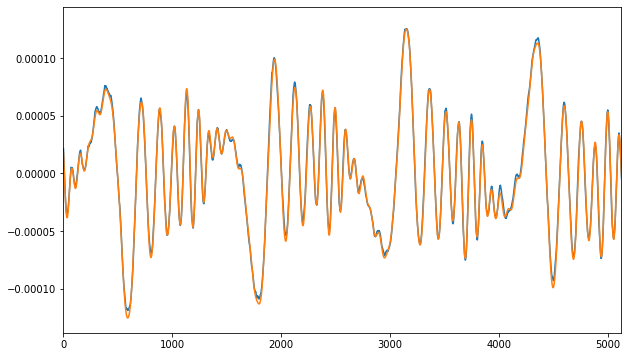

In [261]:
start = 0
window = int(1*1/0.000195)
a = calc_basis_matrix(S, amplitudes_x)

plt.figure(figsize=(10, 6))
plt.plot(X.squeeze())
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

(6000.0, 16256.0)

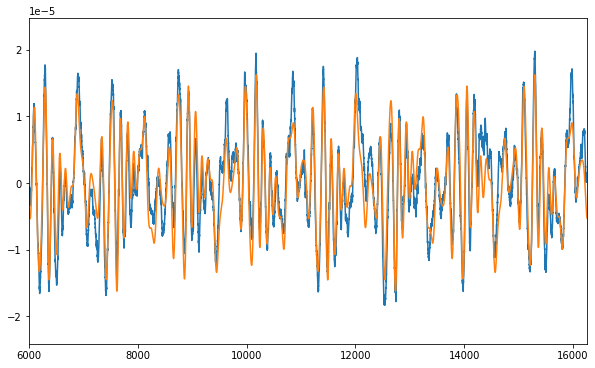

In [262]:
start = 6000
window = int(2*1/0.000195)

a = calc_basis_matrix(S, amplitudes_y)
plt.figure(figsize=(10, 6))
plt.plot(Y.squeeze())
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

(0.0, 5128.0)

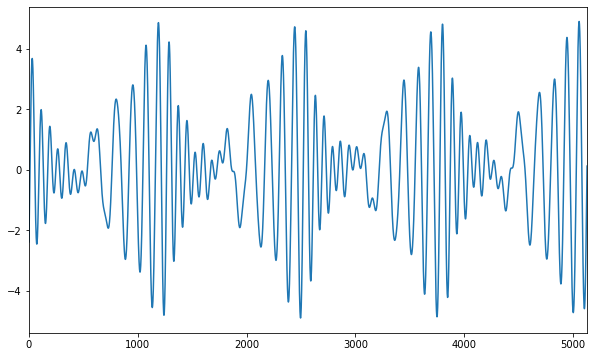

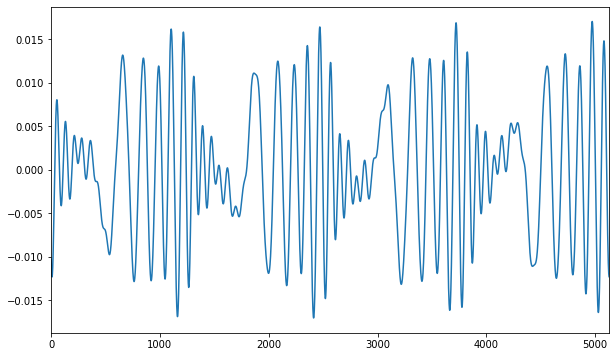

In [263]:
start = 0
window = int(1*1/0.000195)
a = calc_basis_matrix(S_dot2, amplitudes_x)
plt.figure(figsize=(10, 6))
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

a = calc_basis_matrix(S_dot, amplitudes_x)
plt.figure(figsize=(10, 6))
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

(6000.0, 11128.0)

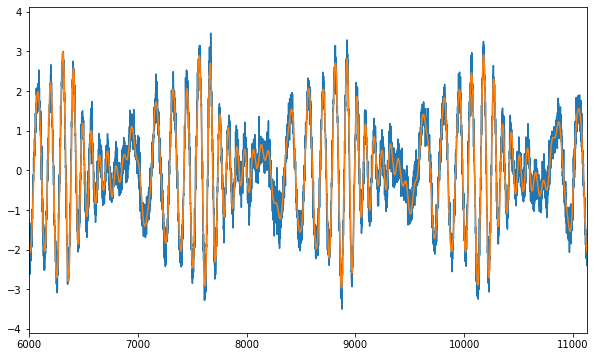

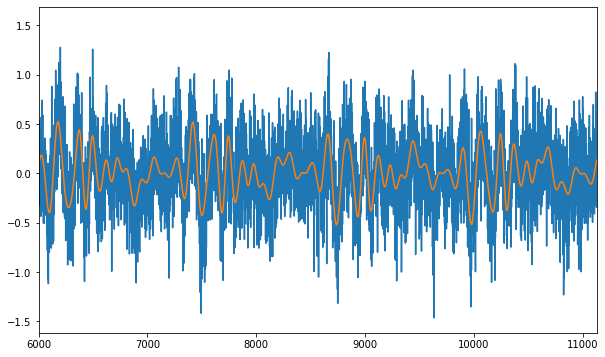

In [264]:
start = 6000
window = int(1*1/0.000195)

a = calc_basis_matrix(S, amplitudes_fx)
plt.figure(figsize=(10, 6))
plt.plot(F[:, 0].squeeze())
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

a = calc_basis_matrix(S, amplitudes_fy)
plt.figure(figsize=(10, 6))
plt.plot(F[:, 1].squeeze())
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

(6000.0, 11128.0)

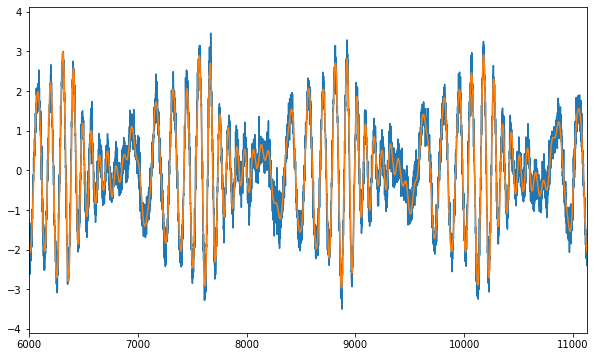

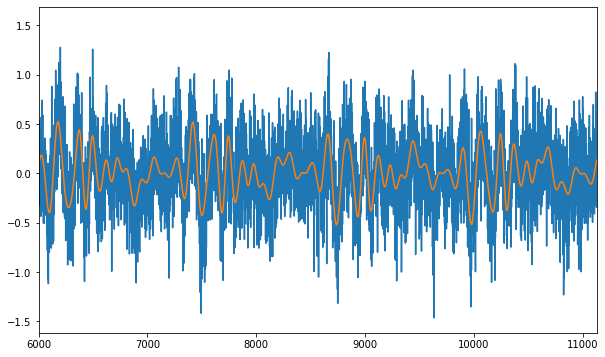

In [265]:
start = 6000
window = int(1*1/0.000195)

a = calc_basis_matrix(S, amplitudes_fx)
plt.figure(figsize=(10, 6))
plt.plot(F[:, 0].squeeze())
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

a = calc_basis_matrix(S, amplitudes_fy)
plt.figure(figsize=(10, 6))
plt.plot(F[:, 1].squeeze())
plt.plot(a.sum(axis=-1))
plt.xlim((start, start + window))

In [266]:
F.shape

(82160, 2)

In [267]:
def build_x_for_frequency_index(*args, index):

    vectors_to_concat = []
    for v in args:
        vectors_to_concat.append(v[:, index].reshape((-1, 1)))
    return np.concatenate(vectors_to_concat, axis=1)
    
    

In [ ]:
X =sel_df["x"].values.reshape((-1, 1))
Y =sel_df["y"].values.reshape((-1, 1))
Fx =sel_df["fx"].values.reshape((-1, 1))
Fy =sel_df["fy"].values.reshape((-1, 1))
F = sel_df[["fx", "fy"]].values.reshape((-1, 2))

Q = sel_df[["x", "y"]].values.reshape((-1, 1))
t = sel_df["t"].values.reshape((-1, 1))

index = 16
coefs_list = []
errors_list = []
Xs = []
Ys = []
coefs_list_sk =[]

for index in range(17):
    X_project = calc_basis_matrix(S, amplitudes_x)
    Y_project = calc_basis_matrix(S, amplitudes_y)
    X_dot_project = calc_basis_matrix(S_dot,amplitudes_x)
    Y_dot_project = calc_basis_matrix(S_dot, amplitudes_y)
    X_dot2_project = calc_basis_matrix(S_dot2, amplitudes_x)
    Y_dot2_project = calc_basis_matrix(S_dot2, amplitudes_y)
    Fx_project = calc_basis_matrix(S, amplitudes_fx)
    Fy_project = calc_basis_matrix(S, amplitudes_fy)



    X_input = build_x_for_frequency_index(X_project, Y_project, X_dot_project, Y_dot_project, index=index)
    X_dot2_input = build_x_for_frequency_index(X_dot2_project, Y_dot2_project, index=index)
    #F_output = build_x_for_frequency_index(F, index=index)
    F_output = build_x_for_frequency_index(Fx_project, index=index)


    Y_output = F_output - X_dot2_input @ np.array([[1, 0],[0, 1]])


    coefs, _, _, _ = np.linalg.lstsq(X_input, Y_output, rcond=None)

    errors = Y_output -  X_input @ coefs 
    
    coefs_list.append(coefs)
    
    Ys.append(Y_output)
    Xs.append(X_input)
    errors_list.append(errors)
    
    reg = LinearRegression(fit_intercept=False, normalize=False).fit(X_input, Y_output)
    score = reg.score(X_input, Y_output)
    coefs_list_sk.append(reg.coef_)
    print(f"Index: {i} - score = {score}")
    
    plt.plot(Y_output[:, 0])
    plt.plot(reg.predict(X_input)[:, 0])

    plt.xlim((0, 2000))
    plt.show()
    
    
    plt.plot(Y_output[:, 0])
    plt.plot(X_input @ coefs[:, 0])

    plt.xlim((0, 2000))
    plt.show()
    
    
errors_list = np.array(errors_list)
coefs_list = np.array(coefs_list)
coefs_list_sk = np.array(coefs_list_sk)
Xs = np.array(Xs)
Ys = np.array(Ys)

Index: 8 - score = 1.0


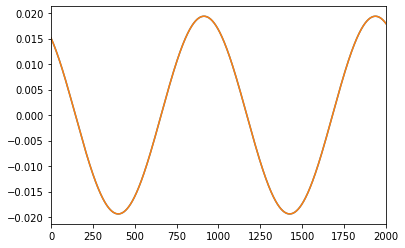

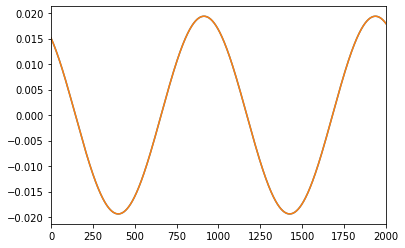

Index: 8 - score = 1.0


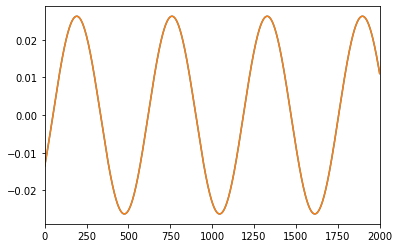

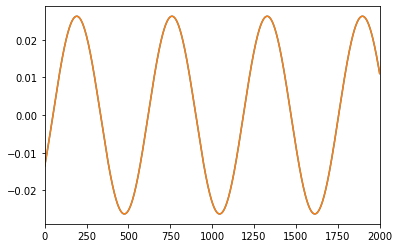

Index: 8 - score = 1.0


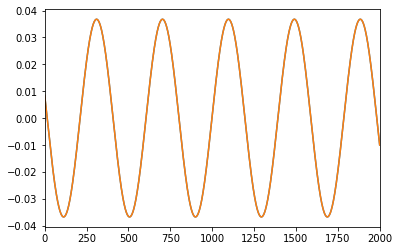

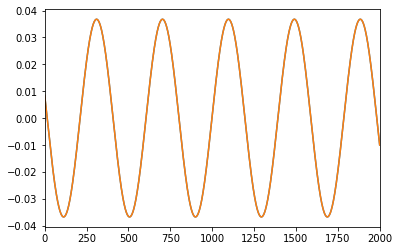

Index: 8 - score = 1.0


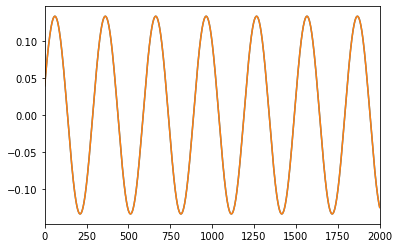

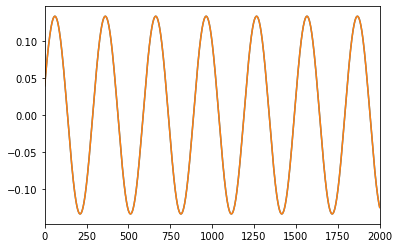

Index: 8 - score = 1.0


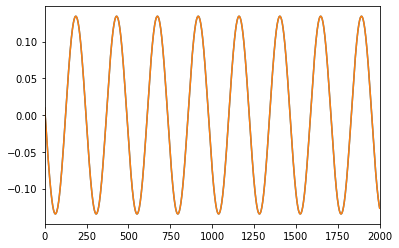

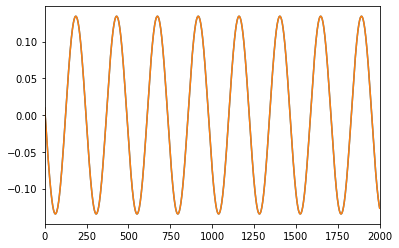

Index: 8 - score = 1.0


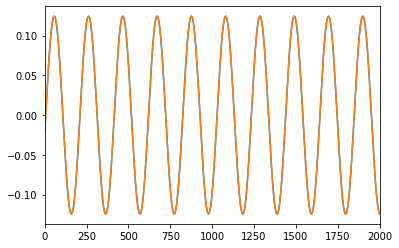

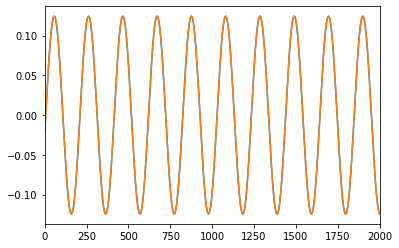

Index: 8 - score = 1.0


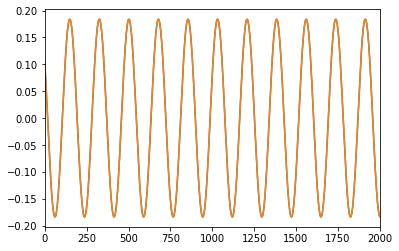

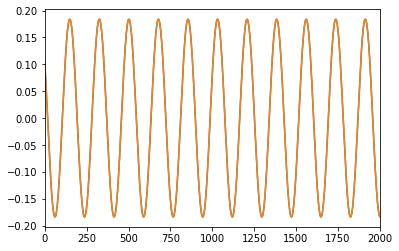

Index: 8 - score = 1.0


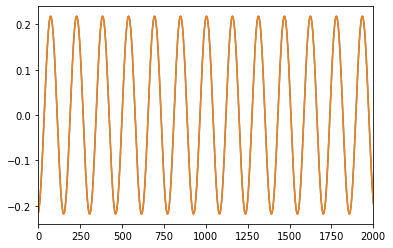

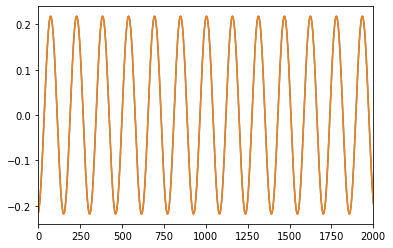

Index: 8 - score = 1.0


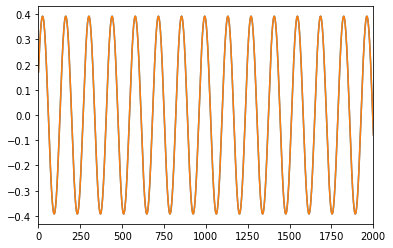

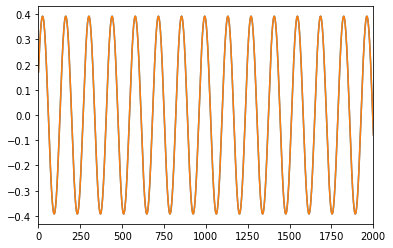

Index: 8 - score = 1.0


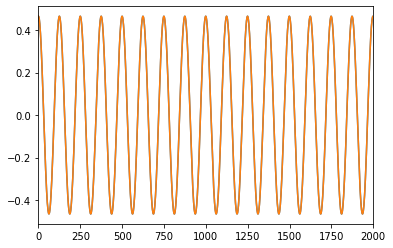

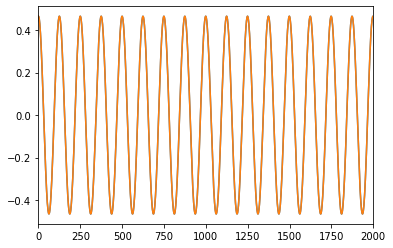

Index: 8 - score = 1.0


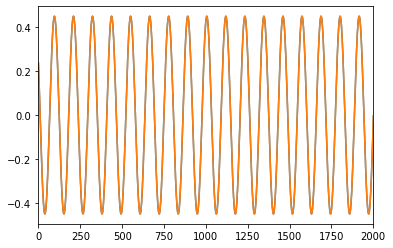

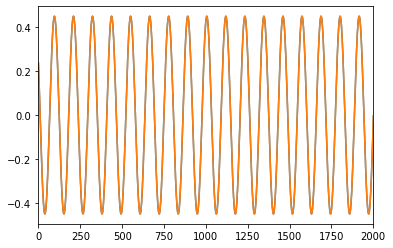

Index: 8 - score = 1.0


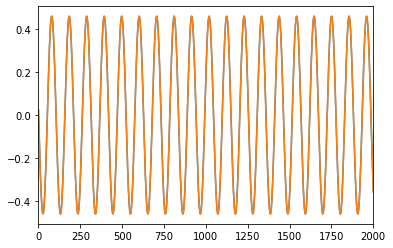

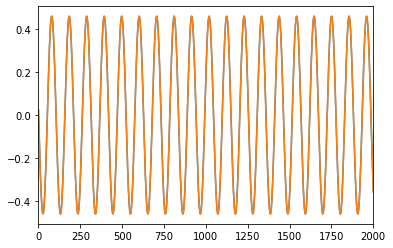

Index: 8 - score = 1.0


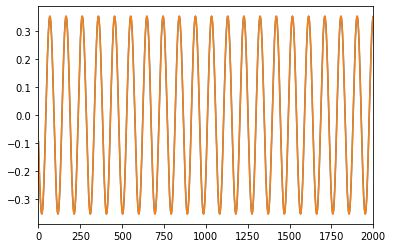

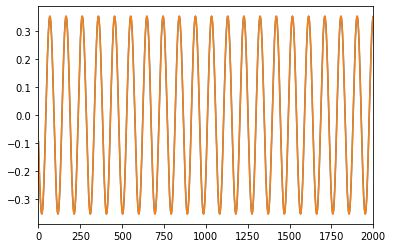

Index: 8 - score = 1.0


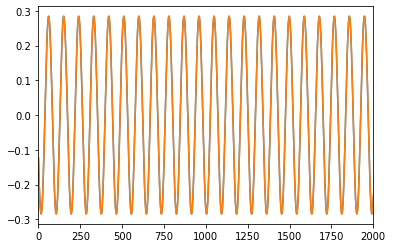

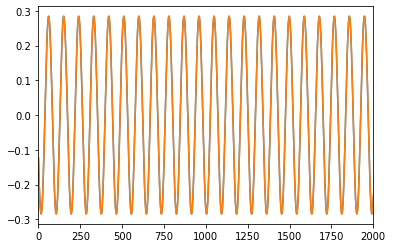

Index: 8 - score = 1.0


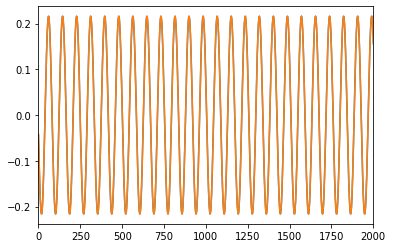

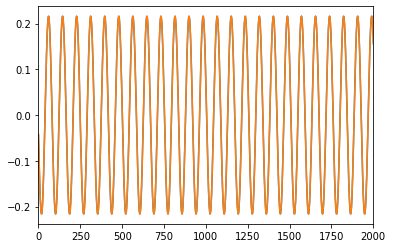

Index: 8 - score = 1.0


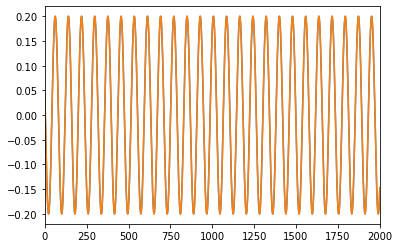

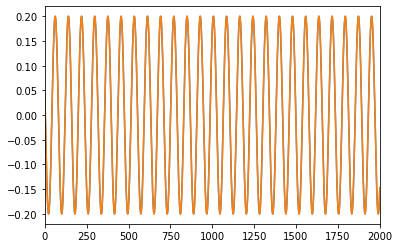

Index: 8 - score = 1.0


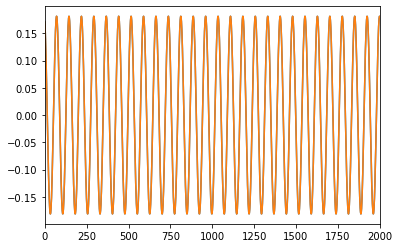

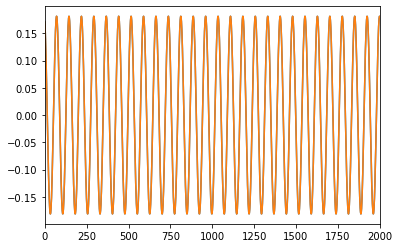

In [268]:
index = 16
coefs_list = []
errors_list = []
Xs = []
Ys = []

coefs_list_sk =[]

for index in range(17):
    X_project = calc_basis_matrix(S, amplitudes_x)
    Y_project = calc_basis_matrix(S, amplitudes_y)
    X_dot_project = calc_basis_matrix(S_dot,amplitudes_x)
    Y_dot_project = calc_basis_matrix(S_dot, amplitudes_y)
    X_dot2_project = calc_basis_matrix(S_dot2, amplitudes_x)
    Y_dot2_project = calc_basis_matrix(S_dot2, amplitudes_y)
    Fx_project = calc_basis_matrix(S, amplitudes_fx)
    Fy_project = calc_basis_matrix(S, amplitudes_fy)



    X_input = build_x_for_frequency_index(X_project, Y_project, X_dot_project, Y_dot_project, index=index)
    X_dot2_input = build_x_for_frequency_index(X_dot2_project, Y_dot2_project, index=index)
    #F_output = build_x_for_frequency_index(F, index=index)
    F_output = build_x_for_frequency_index(Fx_project, index=index)


    Y_output = F_output - X_dot2_input @ np.array([[1, 0],[0, 1]])


    coefs, _, _, _ = np.linalg.lstsq(X_input, Y_output, rcond=None)

    errors = Y_output -  X_input @ coefs 
    
    coefs_list.append(coefs)
    
    Ys.append(Y_output)
    Xs.append(X_input)
    errors_list.append(errors)
    
    reg = LinearRegression(fit_intercept=False, normalize=False).fit(X_input, Y_output)
    score = reg.score(X_input, Y_output)
    coefs_list_sk.append(reg.coef_)
    print(f"Index: {i} - score = {score}")
    
    plt.plot(Y_output[:, 0])
    plt.plot(reg.predict(X_input)[:, 0])

    plt.xlim((0, 2000))
    plt.show()
    
    
    plt.plot(Y_output[:, 0])
    plt.plot(X_input @ coefs[:, 0])

    plt.xlim((0, 2000))
    plt.show()
    
    
errors_list = np.array(errors_list)
coefs_list = np.array(coefs_list)
coefs_list_sk = np.array(coefs_list_sk)
Xs = np.array(Xs)
Ys = np.array(Ys)

In [269]:
from sklearn.linear_model import LinearRegression



reg = LinearRegression().fit(X_input, Y_output)
reg.score(X_input, Y_output)

1.0

(0.0, 2000.0)

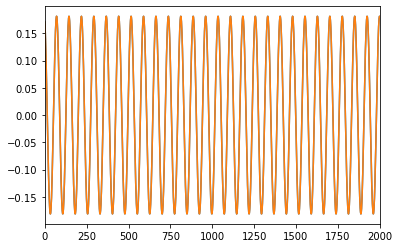

In [270]:
plt.plot(Y_output[:, 0])
plt.plot(reg.predict(X_input)[:, 0])

plt.xlim((0, 2000))

(0.0, 2000.0)

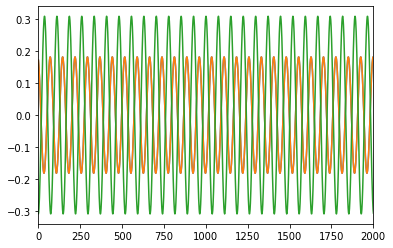

In [273]:
plt.plot(Y_output[:, 0])
plt.plot(X_input @ reg.coef_.transpose() )

plt.xlim((0, 2000))

In [229]:
coefs_list_sk[16]

array([[  1716.27804517,    -41.29185507,   -237.33324402,
        -10906.66702547],
       [ -2932.58394358,     70.55740905,    479.60798072,
         18634.31068323]])

In [207]:
coefs_list[0]

array([[  546.06087076,  -167.77727522],
       [ 9219.20237259, 12820.85638414],
       [   16.9339608 ,    17.29751004],
       [  -25.70408714,   -24.75151471]])

In [182]:
(errors_list**2).sum(axis=1)

array([[5.41164588e-03],
       [1.45608169e+02],
       [4.72579307e-02],
       [9.46056735e+03],
       [2.10288698e+00],
       [3.08051564e+01],
       [1.62321593e+04],
       [3.93555432e+01],
       [4.89540382e+01],
       [9.65367516e+03],
       [1.37298630e+04],
       [1.58299527e+05],
       [2.96464996e+01],
       [1.71911973e+02],
       [6.10878568e+01],
       [5.65254026e+03]])

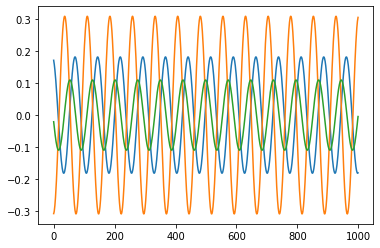

In [230]:
plt.plot(Y_output[:1000])
plt.plot(X_input[:1000, 2]*1e2)

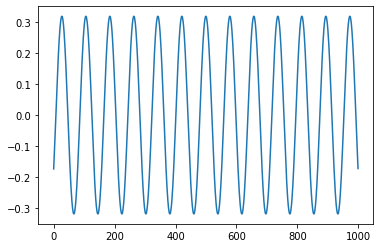

In [184]:
plt.plot(Y_output[:1000])

In [186]:
coefs_list.shape

(16, 4, 1)

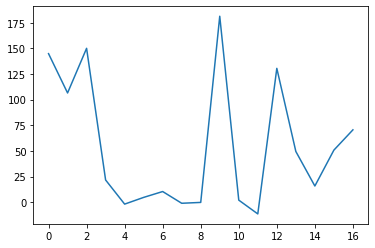

In [258]:
plt.plot(coefs_list[:, 1, 1])

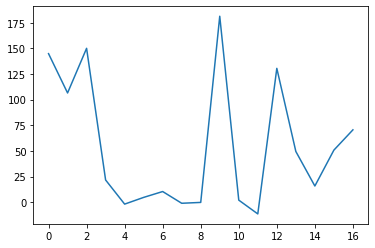

In [250]:
plt.plot(coefs_list_sk[:, 1, 1])

In [106]:
- np.array([[1, 0],[0,1]]) * amplitudes_x.squeeze()[index] * (2 * np.pi * frequencies[index])**2

array([[ 0.73305917, -0.        ],
       [-0.        ,  0.73305917]])

In [99]:
amplitudes_x

array([[ 2.75590147e-05, -1.18461176e-05, -1.03538553e-05,
         1.31749523e-05, -1.93625070e-05,  1.40177556e-05,
        -3.64489554e-06, -5.74636706e-06,  1.48193668e-05,
         4.12003011e-06, -9.16968179e-06, -1.11386997e-05,
        -7.74837288e-06, -5.29311619e-06, -3.89275339e-06,
        -2.78186957e-06, -4.78044441e-07,  2.65404330e-06,
        -2.57650861e-05,  2.54863259e-05, -1.52648327e-05,
         9.40831065e-06, -1.55177107e-05,  1.46225512e-05,
        -1.01840640e-05,  2.31337060e-06,  1.65477975e-05,
         9.88548497e-06,  2.64461470e-06, -8.93190416e-07,
        -1.42755937e-06, -1.33539593e-07,  1.30307263e-06,
         2.47717862e-06]])

In [102]:
amplitudes_x

array([[ 2.75590147e-05, -1.18461176e-05, -1.03538553e-05,
         1.31749523e-05, -1.93625070e-05,  1.40177556e-05,
        -3.64489554e-06, -5.74636706e-06,  1.48193668e-05,
         4.12003011e-06, -9.16968179e-06, -1.11386997e-05,
        -7.74837288e-06, -5.29311619e-06, -3.89275339e-06,
        -2.78186957e-06, -4.78044441e-07,  2.65404330e-06,
        -2.57650861e-05,  2.54863259e-05, -1.52648327e-05,
         9.40831065e-06, -1.55177107e-05,  1.46225512e-05,
        -1.01840640e-05,  2.31337060e-06,  1.65477975e-05,
         9.88548497e-06,  2.64461470e-06, -8.93190416e-07,
        -1.42755937e-06, -1.33539593e-07,  1.30307263e-06,
         2.47717862e-06]])

In [105]:
Y_output = F_output - X_dot2_input[:, 0:1]

In [76]:
Y_output.shape

(82160, 2)

In [77]:
np.linalg.inv(X_input.transpose() @ X_input) @ X_input.transpose() @ Y_output

array([[ 9.59410808e+04,  3.88954401e+04],
       [-2.14859804e+04,  4.67271894e+04],
       [ 1.48415573e+02,  8.48647764e+00],
       [ 2.21573649e+03,  6.11601775e+02]])

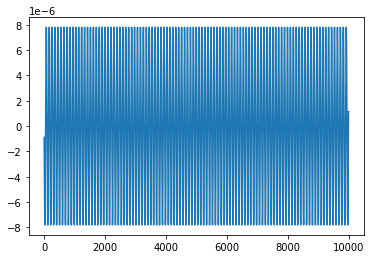

In [43]:
plt.plot(X[:10000, 12])

In [83]:

def build_x_for_frequency_index(*args, index):

    vectors_to_concat = []
    for v in args:
        vectors_to_concat.append(v[:, index].reshape((-1, 1)))
    return np.concatenate(vectors_to_concat, axis=1)
    
    
def get_coefs(S, S_dot, S_dot2, amplitudes_x, amplitudes_y, amplitudes_fx, amplitudes_fy, index, axis = "x"):
    
    
    X_project = calc_basis_matrix(S, amplitudes_x)
    Y_project = calc_basis_matrix(S, amplitudes_y)
    X_dot_project = calc_basis_matrix(S_dot,amplitudes_x)
    Y_dot_project = calc_basis_matrix(S_dot, amplitudes_y)
    X_dot2_project = calc_basis_matrix(S_dot2, amplitudes_x)
    Y_dot2_project = calc_basis_matrix(S_dot2, amplitudes_y)
    Fx_project = calc_basis_matrix(S, amplitudes_fx)
    Fy_project = calc_basis_matrix(S, amplitudes_fy)
    


    X_input = build_x_for_frequency_index(X_project, Y_project, X_dot_project, Y_dot_project, X_dot2_project, Y_dot2_project, index=index)
    X_dot2_input = build_x_for_frequency_index(X_dot2_project, Y_dot2_project, index=index)
    #F_output = build_x_for_frequency_index(F, index=index)
    F_output = build_x_for_frequency_index(Fx_project, Fy_project, index=index)
    
    
    Y_output = F_output# - X_dot2_input
    
        
    coefs = np.linalg.inv(X_input.transpose() @ X_input) @ X_input.transpose() @ Y_output
    
    errors = Y_output -  X_input @ coefs 
    return coefs, errors, Y_output , X_input @ coefs 

In [84]:
coefs = []
errors = []
truths = []
preds = []
for i in range(15):
    c, err, truth, pred = get_coefs(S, S_dot, S_dot2, amplitudes_x, amplitudes_y, amplitudes_fx, amplitudes_fy, index=i, axis = "x")
    
    coefs.append(c)
    errors.append(err)
    truths.append(truth.squeeze())
    preds.append(pred.squeeze())
    
coefs = np.array(coefs).squeeze()
err = np.array(err).squeeze()

In [85]:
coefs.shape

(15, 6, 2)

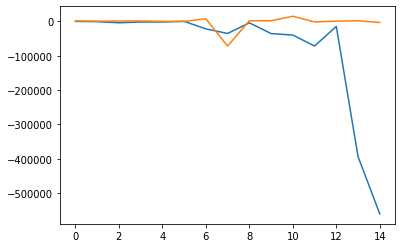

In [88]:
plt.plot(coefs[:, 0])

In [89]:
coefs.shape

(15, 6, 2)

In [90]:
coefs.shape

(15, 6, 2)

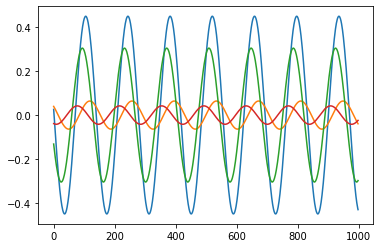

In [93]:
i = 8
plt.plot(truths[i][1:1000])
plt.plot(preds[i][1:1000])

In [70]:
build_x_for_frequency_index

<function __main__.build_x_for_frequency_index(*args, index)>